APRENDIZAJE NO SUPERVISADO

CLUSTERING DE NASHVILLE HOUSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('Nashville Housing.csv')
data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data=data.drop(["ParcelID","SoldAsVacant", "LandUse","PropertyAddress","SaleDate","LegalReference","OwnerName","OwnerAddress","TaxDistrict","Bedrooms","FullBath","HalfBath"], axis=1)
data

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
0,2045,240000,2.3,50000.0,168200.0,235700.0,1986.0
1,16918,366000,3.5,50000.0,264100.0,319000.0,1998.0
2,54582,435000,2.9,50000.0,216200.0,298000.0,1987.0
3,43070,255000,2.6,50000.0,147300.0,197300.0,1985.0
4,22714,278000,2.0,50000.0,152300.0,202300.0,1984.0
...,...,...,...,...,...,...,...
56472,30469,157500,NaN,NaN,NaN,NaN,NaN
56473,27707,145000,NaN,NaN,NaN,NaN,NaN
56474,52709,234611,NaN,NaN,NaN,NaN,NaN
56475,54042,93844,NaN,NaN,NaN,NaN,NaN


In [33]:
#data["SoldAsVacant"] = data["SoldAsVacant"].map(
#    {"No": "0","Yes": "1","N": "0", "Y": "1"},
    #na_action=None,
#)
#data['SoldAsVacant'] = data['SoldAsVacant'].astype(float) # convierto la columna SoldAsVacant en entero
#data["SoldAsVacant"].value_counts()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueID       56477 non-null  int64  
 1   SalePrice      56477 non-null  object 
 2   Acreage        26015 non-null  float64
 3   LandValue      26015 non-null  float64
 4   BuildingValue  26015 non-null  float64
 5   TotalValue     26015 non-null  float64
 6   YearBuilt      24163 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ MB


In [35]:
data['SalePrice'] = data['SalePrice'].str.replace('$','') #reemplazo el caracter $ por un espacio vacio
data['SalePrice'] = data['SalePrice'].str.strip() #elimino los espacios en blanco al pricipio y al final de cada valor
data['SalePrice'] = data['SalePrice'].str.replace(',', '', regex=False).astype(float) #reemplaza la , por espacio en blanco y convierte a flotante
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueID       56477 non-null  int64  
 1   SalePrice      56477 non-null  float64
 2   Acreage        26015 non-null  float64
 3   LandValue      26015 non-null  float64
 4   BuildingValue  26015 non-null  float64
 5   TotalValue     26015 non-null  float64
 6   YearBuilt      24163 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.0 MB


In [36]:
df=data.fillna(data.median())
data=data.fillna(data.median()) #completo los valores NA con la mediana
data

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
0,2045,240000.0,2.30,50000.0,168200.0,235700.0,1986.0
1,16918,366000.0,3.50,50000.0,264100.0,319000.0,1998.0
2,54582,435000.0,2.90,50000.0,216200.0,298000.0,1987.0
3,43070,255000.0,2.60,50000.0,147300.0,197300.0,1985.0
4,22714,278000.0,2.00,50000.0,152300.0,202300.0,1984.0
...,...,...,...,...,...,...,...
56472,30469,157500.0,0.27,28800.0,111400.0,148500.0,1960.0
56473,27707,145000.0,0.27,28800.0,111400.0,148500.0,1960.0
56474,52709,234611.0,0.27,28800.0,111400.0,148500.0,1960.0
56475,54042,93844.0,0.27,28800.0,111400.0,148500.0,1960.0


In [37]:
data.describe()

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
count,56477.000000,5.647700e+04,56477.000000,5.647700e+04,5.647700e+04,5.647700e+04,56477.00000
mean,28334.001133,3.272264e+05,0.375449,4.734891e+04,1.341481e+05,1.871355e+05,1961.60221
std,16352.590651,9.298326e+05,1.071943,7.471502e+04,1.424953e+05,1.952834e+05,17.45997
min,0.000000,5.000000e+01,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.00000
25%,14186.000000,1.350000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
50%,28313.000000,2.051000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
75%,42513.000000,3.285000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
max,56635.000000,5.427806e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.00000


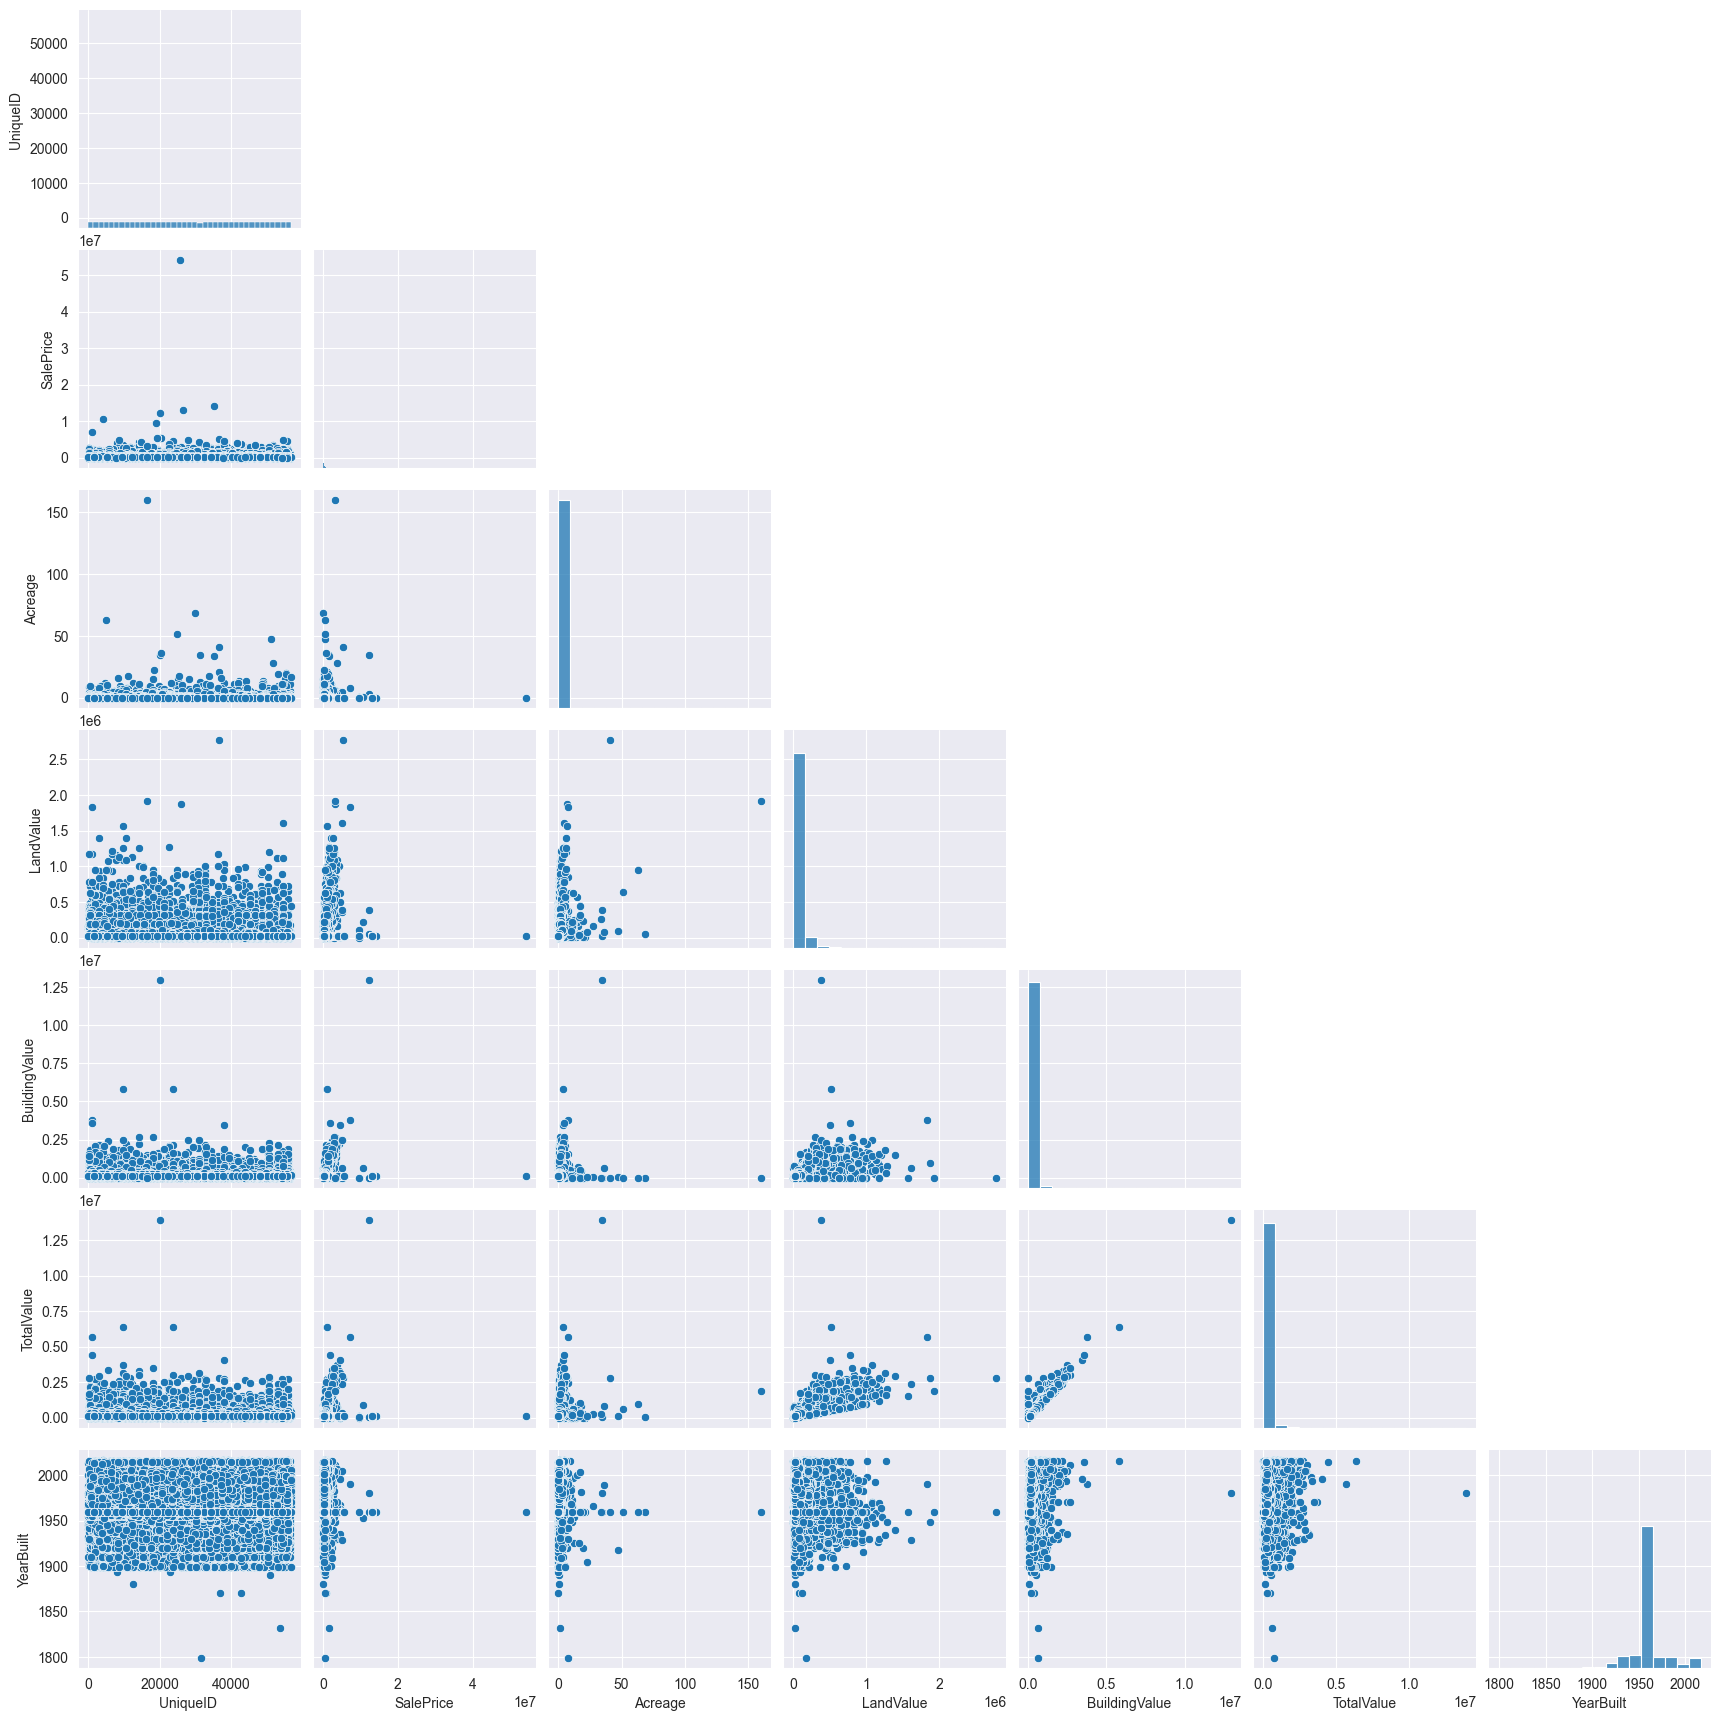

In [38]:
# Visualizacion de las distribuciones de a pares

sns.set_style("darkgrid")

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

pairplot = sns.pairplot(data)
pairplot.map_upper(hide_current_axis)
plt.show()

In [39]:
# Preparacion de los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

X = data

def min_max_scaling(dat):
    return (dat - dat.min())/(dat.max() - dat.min())


# - Atributo SalePrice
X['SalePrice'] = min_max_scaling(X['SalePrice'])

# - Atrbuto Acreage
X['Acreage'] = min_max_scaling(X['Acreage'])

# - Atrbuto LandValue
X['LandValue'] = min_max_scaling(X['LandValue'])

# - Atrbuto BuildingValue
X['BuildingValue'] = min_max_scaling(X['BuildingValue'])

# - Atrbuto TotalValue
X['TotalValue'] = min_max_scaling(X['TotalValue'])

# - Atrbuto YearBuilt
X['YearBuilt'] = min_max_scaling(X['YearBuilt'])

X

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
0,2045,0.004421,0.014308,0.018002,0.012967,0.016901,0.857798
1,16918,0.006742,0.021806,0.018002,0.020360,0.022876,0.912844
2,54582,0.008013,0.018057,0.018002,0.016667,0.021370,0.862385
3,43070,0.004697,0.016182,0.018002,0.011355,0.014146,0.853211
4,22714,0.005121,0.012434,0.018002,0.011741,0.014505,0.848624
...,...,...,...,...,...,...,...
56472,30469,0.002901,0.001624,0.010354,0.008588,0.010645,0.738532
56473,27707,0.002671,0.001624,0.010354,0.008588,0.010645,0.738532
56474,52709,0.004321,0.001624,0.010354,0.008588,0.010645,0.738532
56475,54042,0.001728,0.001624,0.010354,0.008588,0.010645,0.738532


In [40]:
df.describe()

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
count,56477.000000,5.647700e+04,56477.000000,5.647700e+04,5.647700e+04,5.647700e+04,56477.00000
mean,28334.001133,3.272264e+05,0.375449,4.734891e+04,1.341481e+05,1.871355e+05,1961.60221
std,16352.590651,9.298326e+05,1.071943,7.471502e+04,1.424953e+05,1.952834e+05,17.45997
min,0.000000,5.000000e+01,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.00000
25%,14186.000000,1.350000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
50%,28313.000000,2.051000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
75%,42513.000000,3.285000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.00000
max,56635.000000,5.427806e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.00000


In [46]:
from sklearn.cluster import KMeans

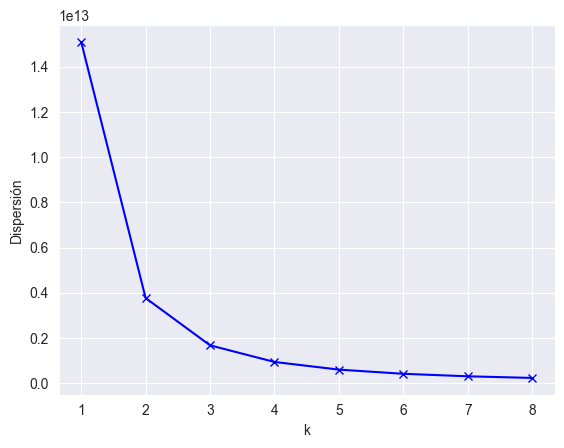

In [47]:
inertia = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 9), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel(u'Dispersión')
plt.show()

In [49]:
km = KMeans(n_clusters=5,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=42)

clusters_pred = km.fit_predict(X)

cluster_labels = np.unique(clusters_pred)
n_clusters = cluster_labels.shape[0]

In [50]:
cluster_labels

array([0, 1, 2, 3, 4], dtype=int32)

In [51]:
n_clusters

5

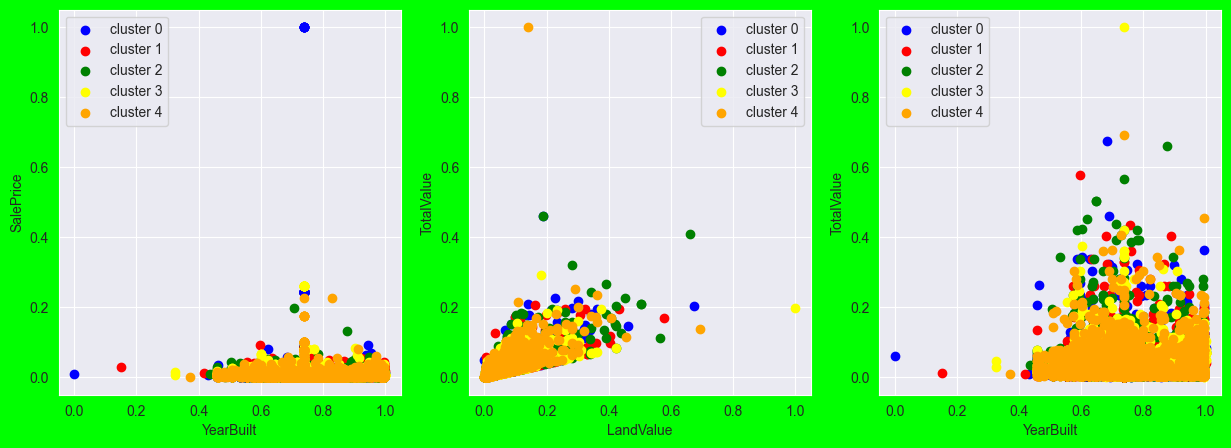

In [52]:
data['cluster'] = clusters_pred
data_np = data.to_numpy()

fig, axes = plt.subplots(1,3, figsize=(15,5),facecolor='lime')


for cluster, color in enumerate(['blue', 'red', 'green', 'yellow', 'orange']):

    #Annual SalePrice vs YearBuilt
    axes[0].scatter(x=data_np[data_np[:,7] == cluster, 6],
                    y=data_np[data_np[:,7] == cluster, 1],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[0].legend()
    axes[0].set_xlabel('YearBuilt')
    axes[0].set_ylabel('SalePrice')

    #Spending TotalValue vs LandValue
    axes[1].scatter(x=data_np[data_np[:,7] == cluster, 3],
                    y=data_np[data_np[:,7] == cluster, 5],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[1].legend()
    axes[1].set_xlabel('LandValue')
    axes[1].set_ylabel('TotalValue')

    #Annual TotalValue vs YearBuilt
    axes[2].scatter(x=data_np[data_np[:,7] == cluster, 6],
                    y=data_np[data_np[:,7] == cluster, 3],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[2].legend()
    axes[2].set_xlabel('YearBuilt')
    axes[2].set_ylabel('TotalValue')


plt.show()

In [53]:
df['cluster'] = data['cluster'].replace({0: 'cluster 0', 1:'cluster 1', 2:'cluster 2',3:'cluster 3', 4:'cluster 4'})
df

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,cluster
0,2045,240000.0,2.30,50000.0,168200.0,235700.0,1986.0,cluster 2
1,16918,366000.0,3.50,50000.0,264100.0,319000.0,1998.0,cluster 4
2,54582,435000.0,2.90,50000.0,216200.0,298000.0,1987.0,cluster 1
3,43070,255000.0,2.60,50000.0,147300.0,197300.0,1985.0,cluster 3
4,22714,278000.0,2.00,50000.0,152300.0,202300.0,1984.0,cluster 0
...,...,...,...,...,...,...,...,...
56472,30469,157500.0,0.27,28800.0,111400.0,148500.0,1960.0,cluster 0
56473,27707,145000.0,0.27,28800.0,111400.0,148500.0,1960.0,cluster 0
56474,52709,234611.0,0.27,28800.0,111400.0,148500.0,1960.0,cluster 1
56475,54042,93844.0,0.27,28800.0,111400.0,148500.0,1960.0,cluster 1


In [54]:
df.groupby(['cluster']).mean()

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
cluster,,,,,,,
cluster 0,27906.934922,447232.172297,0.378653,47010.039474,137519.494577,190170.883624,1961.701014
cluster 1,50850.500000,294244.979343,0.376245,44750.830337,121959.446845,172114.356698,1961.222472
cluster 2,5551.711312,241024.570045,0.374294,52823.266244,144261.321267,202756.406516,1961.201810
cluster 3,39319.277099,349879.570169,0.368521,44594.485512,128829.987781,178993.281114,1962.101588
cluster 4,16690.449825,302541.491794,0.379653,47791.892028,138836.741099,192546.362479,1961.780199


DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
df=df.drop(["SalePrice", "Acreage","BuildingValue","YearBuilt", "cluster"], axis=1)
df

,UniqueID,LandValue,TotalValue
0,2045,50000.0,235700.0
1,16918,50000.0,319000.0
2,54582,50000.0,298000.0
3,43070,50000.0,197300.0
4,22714,50000.0,202300.0
...,...,...,...
56472,30469,28800.0,148500.0
56473,27707,28800.0,148500.0
56474,52709,28800.0,148500.0
56475,54042,28800.0,148500.0


In [58]:
df_LandValue= df["LandValue"]
df_LandValue

0        50000.0
1        50000.0
2        50000.0
3        50000.0
4        50000.0
          ...   
56472    28800.0
56473    28800.0
56474    28800.0
56475    28800.0
56476    28800.0
Name: LandValue, Length: 56477, dtype: float64

In [59]:
df_TotalValue= df["TotalValue"]
df_TotalValue

0        235700.0
1        319000.0
2        298000.0
3        197300.0
4        202300.0
           ...   
56472    148500.0
56473    148500.0
56474    148500.0
56475    148500.0
56476    148500.0
Name: TotalValue, Length: 56477, dtype: float64

In [ ]:
df_concat = pd.concat([df_TotalValue, df_LandValue], axis=1)

In [61]:
df_concat

,TotalValue,LandValue
0,235700.0,50000.0
1,319000.0,50000.0
2,298000.0,50000.0
3,197300.0,50000.0
4,202300.0,50000.0
...,...,...
56472,148500.0,28800.0
56473,148500.0,28800.0
56474,148500.0,28800.0
56475,148500.0,28800.0


In [62]:
nmp = df_concat.to_numpy()
nmp

array([[235700.,  50000.],
       [319000.,  50000.],
       [298000.,  50000.],
       ...,
       [148500.,  28800.],
       [148500.,  28800.],
       [148500.,  28800.]], shape=(56477, 2))

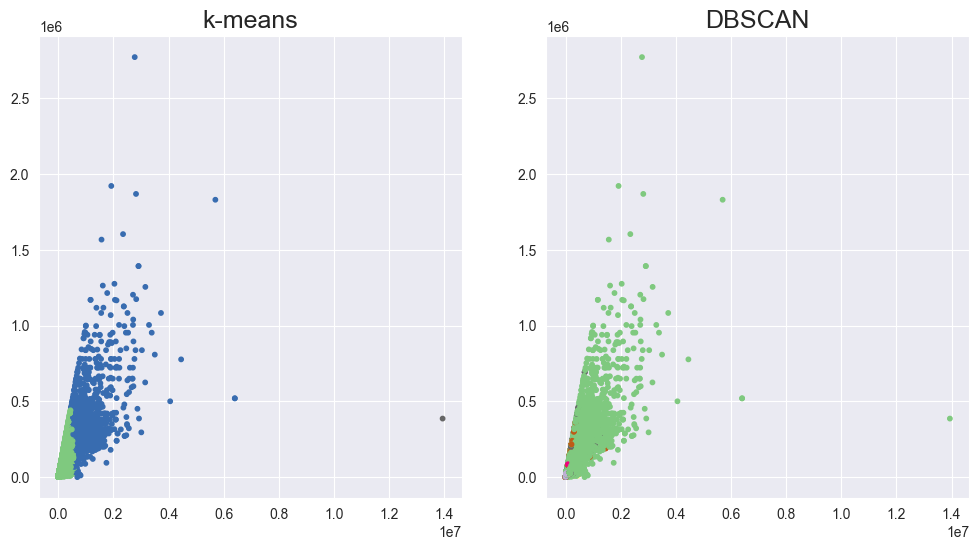

In [64]:
km = KMeans(n_clusters = 3,
            random_state = 42).fit_predict(nmp)

db = DBSCAN(eps = 0.6,
            min_samples = 3,
            metric = 'euclidean').fit_predict(nmp)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('k-means', size=18)
plt.scatter(nmp[:, 0], nmp[:, 1], s=10,  c = km, cmap = 'Accent')

plt.subplot(1, 2, 2)
plt.title('DBSCAN', size=18)
plt.scatter(nmp[:, 0], nmp[:, 1], s=10,  c = db, cmap = 'Accent')
plt.show()

In [80]:
data_2 = pd.read_csv('Nashville Housing.csv')
data_2

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_YearBuilt= data_2["YearBuilt"]
df_YearBuilt

0        1986.0
1        1998.0
2        1987.0
3        1985.0
4        1984.0
          ...  
56472       NaN
56473       NaN
56474       NaN
56475       NaN
56476       NaN
Name: YearBuilt, Length: 56477, dtype: float64

In [82]:
df_YearBuilt=df_YearBuilt.fillna(df_YearBuilt.median())
df_YearBuilt

0        1986.0
1        1998.0
2        1987.0
3        1985.0
4        1984.0
          ...  
56472    1960.0
56473    1960.0
56474    1960.0
56475    1960.0
56476    1960.0
Name: YearBuilt, Length: 56477, dtype: float64

In [83]:
df_TotalValue= data_2["TotalValue"]
df_TotalValue=df_TotalValue.fillna(df_TotalValue.median())
df_TotalValue

0        235700.0
1        319000.0
2        298000.0
3        197300.0
4        202300.0
           ...   
56472    148500.0
56473    148500.0
56474    148500.0
56475    148500.0
56476    148500.0
Name: TotalValue, Length: 56477, dtype: float64

In [84]:
df_concat2 = pd.concat([df_YearBuilt, df_TotalValue], axis=1)
df_concat2

,YearBuilt,TotalValue
0,1986.0,235700.0
1,1998.0,319000.0
2,1987.0,298000.0
3,1985.0,197300.0
4,1984.0,202300.0
...,...,...
56472,1960.0,148500.0
56473,1960.0,148500.0
56474,1960.0,148500.0
56475,1960.0,148500.0


In [85]:
nmp2 = df_concat2.to_numpy()
nmp2

array([[  1986., 235700.],
       [  1998., 319000.],
       [  1987., 298000.],
       ...,
       [  1960., 148500.],
       [  1960., 148500.],
       [  1960., 148500.]], shape=(56477, 2))

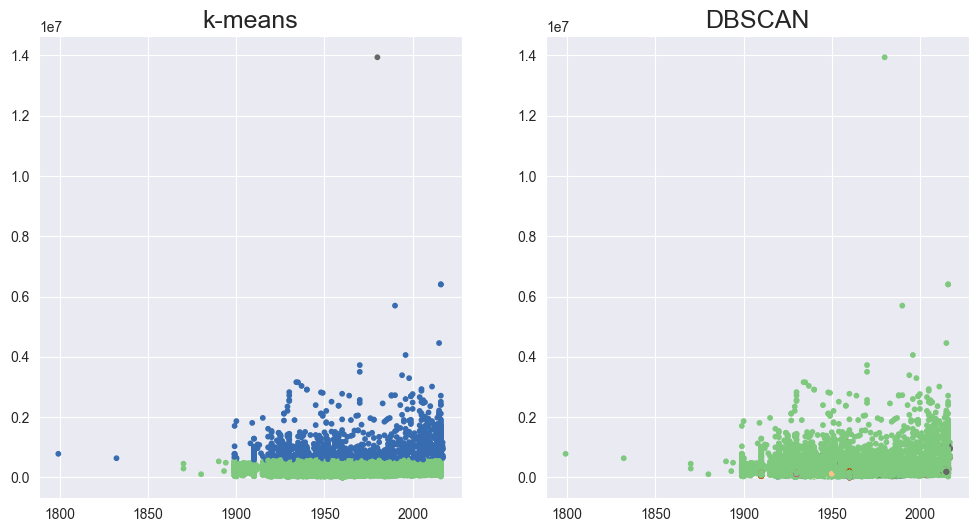

In [86]:
km = KMeans(n_clusters = 3,
            random_state = 42).fit_predict(nmp2)

db = DBSCAN(eps = 0.6,
            min_samples = 3,
            metric = 'euclidean').fit_predict(nmp2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('k-means', size=18)
plt.scatter(nmp2[:, 0], nmp2[:, 1], s=10,  c = km, cmap = 'Accent')

plt.subplot(1, 2, 2)
plt.title('DBSCAN', size=18)
plt.scatter(nmp2[:, 0], nmp2[:, 1], s=10,  c = db, cmap = 'Accent')
plt.show()